In [1]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
# fs=20
# import ClassMSSFR
# from matplotlib.ticker import (FormatStrFormatter,
#                                AutoMinorLocator)

In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD)
        print(MSSFRnameslist[ind_SFRD])
        
        
        

        
        
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}



physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' ]

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}


print(alphabetPhysicalNameDict['E'])


0 .0.0.0
000
16 .2.3.1
231
20 .3.1.2
312
\textbf{unstable case BB}


In [3]:
def calculateMaxVariations(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist):

    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]


    
    
    
#     nrDATAready = 11
#     nModels=11
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    existingBPSnameslist_ind = np.arange(len(BPSnameslist))
    
    # if you want to exclude model E:
#     existingBPSnameslist_ind = [0,1,2,3,5,6,7,8,9,10,11,12,13,14]
#     print(existingBPSnameslist_ind)
    
    
    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    
    
    
    
    

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        stringgg =  'AllDCOsimulation'

        df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]
#         print(df)

        if whichRate =='intrinsic':
            rates = rates_L[::2]
#             if ind_L==0:
#                 print('the intrinsic fiducial rate =',rates[0]) 
#                 print()

        elif whichRate=='observed':
            rates = rates_L[1::2]
#             if ind_L==0:
#                 print('the observed fiducial rate =',rates[0]) 
            ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

        # over different models
        
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        
        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(rates), np.max(rates)])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)[existingBPSnameslist_ind]):
            ind_m = existingBPSnameslist_ind[ind]
            
            stringgg =  'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                rates = df[namez0]

#                     if ind_L==0:
#                         print('the intrinsic fiducial rate =',rates[0])            

            elif whichRate=='observed':
                nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                rates = df[nameObs]

#                     if ind_L==0:
#                         print('the observed fiducial rate =',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'

            minMaxBPS[:,ind] = np.asarray([np.min(rates), np.max(rates)])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




In [7]:
# NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
# BHBHrate0 = [19.1-9.0, 19.1+16.2] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
# # BHBHrate0 = [23.9-8.6,23.9+14.9] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
# BHNSrate0 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 

NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf





BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf




def plotRatesRatios_compare(whichRate='intrinsic'):
    ncols=2
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,16), 
                  gridspec_kw={"width_ratios":[2,0.6], "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62', 'k']
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    maxRatio_BHNSBNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100    
    minRatio_BHNSBNS =100
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_t, DCOtype in enumerate(Types):

        
            # remove if statement once also created datafiles for BHBH ans NSNS
#             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
            stringgg = 'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabels =[r'$\mathcal{R}_{\rm{m}}^{{0,\rm{BHNS}}} / \mathcal{R}_{\rm{m}}^{{0,\rm{BHBH}}}$', r'$\mathcal{R}_{\rm{m}}^{{0,\rm{NSNS}}} / \mathcal{R}_{\rm{m}}^{{0,\rm{BHBH}}}$',\
                          r'$\mathcal{R}_{\rm{m}}^{{0,\rm{BHNS}}} / \mathcal{R}_{\rm{m}}^{{0,\rm{NSNS}}}$']

            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabels = [r'$\mathcal{R}_{\rm{det}}^{{\rm{BHNS}}} / \mathcal{R}_{\rm{det}}^{{\rm{BHBH}}}$', r'$\mathcal{R}_{\rm{det}}^{{\rm{NSNS}}} / \mathcal{R}_{\rm{det}}^{{\rm{BHBH}}}$',\
                          r'$\mathcal{R}_{\rm{det}}^{{\rm{BHNS}}} / \mathcal{R}_{\rm{det}}^{{\rm{NSNS}}}$']

            # obtain rates:
            if DCOtype=='BBH':
                rates_BBH = rates
            elif DCOtype=='BHNS':
                rates_BHNS = rates
            elif DCOtype=='BNS':
                rates_BNS = rates
                
        # obtain ratios
        rates_BHNS = rates_BHNS * (1./rates_BBH)
        rates_BNS = rates_BNS * (1./rates_BBH)
        if ind_L==0:
            print('fiducial BHNS ratio = ', rates_BHNS[0])
            print('fiducial NSNS ratio = ', rates_BNS[0])
            print('per 44 BHBHs:')
            print('fiducial BHNS ratio = ', rates_BHNS[0]*44)
            print('fiducial NSNS ratio = ', rates_BNS[0]*44)
        
        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
        maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        maxRatio_BHNSBNS = np.max(np.concatenate(([maxRatio_BHNSBNS], rates_BHNS/rates_BNS)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_BHNS)))
        minRatio_BNS  = np.min(np.concatenate(([minRatio_BNS], rates_BNS))) 
        minRatio_BHNSBNS = np.min(np.concatenate(([minRatio_BHNSBNS], rates_BHNS/rates_BNS)))
            
        if ind_L==0:
            COLOR= TypeColours[ind_t]#  'crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif MSSFRname=='231':
            COLOR=TypeColours[ind_t]#'teal'
            zorder=10
            label=MSSFRnameslist[ind_L] 
            ls = MSSFRlinestyles[1]
            ALPHA=1
        elif MSSFRname=='312':
            COLOR=TypeColours[ind_t]#'c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
        else:
            COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None    
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
            
            

        
        axe[0,0].plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe[0,0].scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=30, zorder=zorder, alpha=ALPHA)


        axe[1,0].plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe[1,0].scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=30,  zorder=zorder, alpha=ALPHA) 
        

        axe[2,0].plot(range(len(rates)), rates_BHNS/rates_BNS, c='k', lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe[2,0].scatter(range(len(rates)), rates_BHNS/rates_BNS, c='k', s=30,  zorder=zorder, alpha=ALPHA) 
        
#         axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
            
#             axe[ind_t,0].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
#             axe[ind_t,0].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
            # plot fiducial result with a star
        if ind_L==0:
            axe[0,0].scatter(range(len(rates))[0], rates_BHNS[0],\
                               c=TypeColours[1], s=250, label=label, \
                               zorder=1000, marker='*', edgecolor='black')
            axe[1,0].scatter(range(len(rates))[0], rates_BNS[0],\
                                           c=TypeColours[2], s=250, label=label, \
                                           zorder=1000, marker='*', edgecolor='black')
            axe[2,0].scatter(range(len(rates))[0], (rates_BHNS/rates_BNS)[0],\
                               c='k', s=250, label=label, \
                               zorder=1000, marker='*', edgecolor='black')
                

#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])




        ## set some of the axes ranges 
        xmin = -0.8
        xmax = nModels -0. # change to len(df.T)
#         xmax_compare = xmax+5


        # FIX
        fix=1
        


        # calculate statistics: 
#         minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

        
        
        
#         print('mean scatter per MSSFR:')
#         print((minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
#         print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#         meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        
#         print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#         print(minMaxPerBPS[1]/minMaxPerBPS[0])
#         print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#         meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#         textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#         textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#         minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
    

    xloc_text = 0.8502
#         axe[ind_t,0].text(xloc_text, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
#         axe[ind_t,0].text(xloc_text, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
                        
#         axe[ind_t,0].text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
#         axe[ind_t,0].text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
        
        
#         ## MAKE RANGE ERROR LINE: 
#         resN = 20
#         scatterline_x = -0.25 * np.ones(resN)
#         scatterline_y = np.linspace(minn,maxx, resN)
#         axe[ind_t,0].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
#         textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
#         yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
#         axe[ind_t,0].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

        
#         axe[ind_t,0].text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
#         axe[ind_t,0].text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
                
        

        
        
    xx = np.linspace(xmin,xmax,15)
        
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t,0].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)

            
#             if ind_t ==0:
#                 # for BHBH rates also plot intrinsic z=0
#                 min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
#                 max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t,0].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")
#                 axe[ind_t,0].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")
# #                 axe[ind_t,0].text(xx[-5], max_obs_rate[0], r'$\mathcal{R}(z=0)$' , rotation = 0, fontsize = fs-12, color = 'k', ha = 'right')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
            
#             # OLD 
# #             min_obs_rate = np.ones_like(xx)*ObservedRatesListOld[ind_t][0]
# #             max_obs_rate = np.ones_like(xx)*ObservedRatesListOld[ind_t][1]
# #             axe[ind_t,0].plot(xx, min_obs_rate, alpha=1, color='lightgray', zorder=0, lw=3, linestyle=':')
# #             axe[ind_t,0].plot(xx, max_obs_rate, alpha=1, color='lightgray', zorder=0, lw=3, linestyle=':')
# #             axe[ind_t,0].text(xx[-1], max_obs_rate[0], 'previous rate limits' , rotation = 0, fontsize = fs-12, color = 'k', ha = 'right')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
                        

            
#             # for BHNS plot that its a upper limit
#             if ind_t==1:
#                 axe[ind_t,0].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)
            
#         else:


    for ind_t in range(3):



#         # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
            axe[ind_t,0].set_xticks(range(nModels))
        else:
            xlabel=r'  $\_$ ' 

        for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
            axe[ind_t,0].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
        axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

        
        axe[ind_t,0].set_xlim(xmin, xmax)
        axe[ind_t,0] == layoutAxes(axe[ind_t,0], nameX=xlabel, nameY=ylabels[ind_t], setMinor=False)
        axe[ind_t,0].set_yscale('log')    
        
        
        if ind_t==0:
            minn, maxx = minRatio_BHNS, maxRatio_BHNS
        elif ind_t==1:
            minn, maxx = minRatio_BNS, maxRatio_BNS
        elif ind_t==2:
            minn, maxx = minRatio_BHNSBNS, maxRatio_BHNSBNS
        if whichRate=='intrinsic':
            textt_min = r'${\rm{min}} = %s $'%roundAndFormat(minn)
            textt_max = r'${\rm{max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'${\rm{min}} = %s $'%roundAndFormat(minn)
            textt_max = r'${\rm{max}} = %s $'%roundAndFormat(maxx)
        xloc_text = 0.8502
        axe[ind_t,0].text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
        axe[ind_t,0].text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')

        
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t,0].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t,0].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

#         ##### SECOND AXIS ######
#         physicalNames = [r'fiducial', r'optimistic \n CE', r'$\alpha=0.5$', r'$\alpha=2$', 'unstable \n case BB', 'rapid SN', r'$\sigma_{\rm{BH}}=0$', r'$\beta=0.25$', r'$\beta=0.5$', , r'$\beta=0.75$',r'$\sigma_{\rm{cc}}=100$',r'$\sigma_{\rm{cc}}=30$' ]
#         ax2y = ax[ind_t,0].twiny()
        
#         # calculate period for 10 Msun BH and 1.4 Msun NS 
#         xx_sep = np.logspace(-1,3,1000)
#         Period = convert_a_to_P_circular(separation=xx_sep*u.Rsun, M1=1.4*u.Msun, M2=10*u.Msun)
#         Period = Period.to(u.d)
#         ax2y.set_xlim(np.min(Period.value),np.max(Period.value))
#         ax2y.set_xscale('log')

#         ax2y.tick_params(labelsize=fs)
#         ax2y.set_xlabel(xlabel, fontsize=fs)   
        
        #############################
        
    
        axe[ind_t,0].set_xticklabels(BPSnameslist)

        axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

#         axe[ind_t,0].text(xloc_text, 0.88, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')

#         if ind_t==0: 
#             handles, labels = axe[ind_t,0].get_legend_handles_labels()
# #             mask = [0,1,2,7]
#             mask=[0,20, 6]
# #             labels=['000', '111', '211', '113']
#             labels = ['000',  '231', '312']
#             lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
#                      bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        
    

        ##### SECOND AXIS ######
        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
    #                 physicalnames.append(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model])
    #                 physicalnames.append(r'\textbf{%s: }'%(bps_model) + alphabetPhysicalNameDict[bps_model])
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe[ind_t,0].twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)      
#     xx2 = np.linspace(xmax+1, xmax+1, 10)
#     yy2 = np.linspace(ylims[ind_t][0], ylims[ind_t][1], 10)
#     axe[ind_t,0].plot(xx2, yy2, lw=3, c='k')
        # set physical labels on bottom
    
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
    #                 physicalnames.append(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model])
    #                 physicalnames.append(r'\textbf{%s: }'%(bps_model) + alphabetPhysicalNameDict[bps_model])
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe[ind_t,0].set_xticks(range(nModels))
            axe[ind_t,0].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        else:
            axe[ind_t,0].set_xticks([])
            axe[ind_t,0].set_xticklabels( () )
            
            
            

    ################################################################ 
    #################### 2nd figure ################################
    ################################################################
    
    nComparisons = 14
    xx = np.asarray(range(nComparisons)) -1 
    xmin, xmax = np.min(xx), np.max(xx) 
    
    
    
    Ncompare = 12
    if whichRate=='intrinsic':
        for ind_t, DCOtype in enumerate(Types):
        
            
            df_name = '/Users/floorbroekgaarden/Downloads/'+TypesLabels[ind_t]+'_intrinsic.csv'
            df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
#             for ind_n, name in enumerate(df.columns):
#                 rate = df[name]
#                 mask_notna = (df[name].notna())
#                 rate = rate[mask_notna]
#                 colors = sns.color_palette("husl", len(rate))
#                 axe[ind_t,1].scatter(  ind_n*np.ones_like(rate), rate, s=30, c='gray')
        
        
        df_name_BHBH = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
        df_name_BHNS = '/Users/floorbroekgaarden/Downloads/BHNS_intrinsic.csv'
        df_name_NSNS = '/Users/floorbroekgaarden/Downloads/NSNS_intrinsic.csv'

        df_BHBH = pd.read_csv(df_name_BHBH, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
        df_BHNS = pd.read_csv(df_name_BHNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
        df_NSNS = pd.read_csv(df_name_NSNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)        
        for ind_n, name in enumerate(df.columns):
            rate_BHBH = df_BHBH[name][df_BHBH[name].notna()]#.astype(float)
            rate_BHNS = df_BHNS[name][df_BHNS[name].notna()]#.astype(float)
            rate_NSNS = df_NSNS[name][df_NSNS[name].notna()]#.astype(float)
            
            maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
            maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
            maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])
            
            maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 
            
            axe[0,1].scatter(  ind_n*np.ones_like(rate_BHBH), (rate_BHNS/rate_BHBH), s=75, c='gray')#, marker='x')
            axe[1,1].scatter(  ind_n*np.ones_like(rate_BHNS), (rate_NSNS/rate_BHBH), s=75, c='gray')#, marker='x')
            axe[2,1].scatter(  ind_n*np.ones_like(rate_NSNS), (rate_BHNS/rate_NSNS), s=75, c='gray')#, marker='x')
            
            axe[0,1].scatter(  ind_n*np.ones_like(rate_BHBH)[maskGWTC2], (rate_BHNS/rate_BHBH)[maskGWTC2], s=75, c='r', marker='x')
            axe[1,1].scatter(  ind_n*np.ones_like(rate_BHNS)[maskGWTC2], (rate_NSNS/rate_BHBH)[maskGWTC2], s=75, c='r', marker='x')
            axe[2,1].scatter(  ind_n*np.ones_like(rate_NSNS)[maskGWTC2], (rate_BHNS/rate_NSNS)[maskGWTC2], s=75, c='r', marker='x')
          
 
            
        for ind_t in range(3):
            if ind_t==2:
                physicalnames = []
                for ind_m, bps_model in enumerate(df.columns):
                    physicalnames.append(r'\textbf{%s}'%(bps_model) )
                axe[ind_t,1].set_xticks(range(nModels))
                axe[ind_t,1].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
                axe[ind_t,1].set_xticks(range(len(df.columns)))
                axe[ind_t,1].set_xticklabels(physicalnames, rotation=90, fontsize=12)

                axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            else:
                print('getting here , ', ind_t)
                axe[ind_t,1].set_xticks([])
                axe[ind_t,1].set_xticklabels( () )


    #     ######################
    #     # make up all the nice things in background and axes

    #     for ind_t, DCOtype in enumerate(Types):
            axe[ind_t,1].set_xlim(xmin, xmax)
    #         axe[ind_t,1] == CV.layoutAxes(axe[ind_t,1], nameX=xlabel, nameY=ylabel)
            axe[ind_t,1].set_yscale('log')    

            axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            axe[ind_t,1].tick_params(labelsize=18)
    
    
    
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t,1].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)

            
#             if ind_t ==0:
#                 # for BHBH rates also plot intrinsic z=0
#                 min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
#                 max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t,1].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")
#                 axe[ind_t,1].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")            

            
#             # for BHNS plot that its a upper limit
#             if ind_t==1:
#                 axe[ind_t,1].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)    
    

    
    

#     axe[ind_t,1] == CV.layoutAxes(axe[ind_t,1], nameX=xlabel, nameY=ylabel)    
    ################################################################
    ################################################################
    ################################################################
    
    
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    plt.savefig('./RatesRatios_' +whichRate + '_AllDCO_newGWTC2_compare.png', dpi=300, transparent=False)#,\
    plt.savefig('./RatesRatios_' +whichRate + '_AllDCO_newGWTC2_compare.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




the observed fiducial rate for  BBH = 278.87649088232206
the observed fiducial rate for  BHNS = 10.827595525955116
the observed fiducial rate for  BNS = 0.8713062720530261
fiducial BHNS ratio =  0.03882577370253864
fiducial NSNS ratio =  0.003124344649118138
per 44 BHBHs:
fiducial BHNS ratio =  1.7083340429117002
fiducial NSNS ratio =  0.13747116456119807


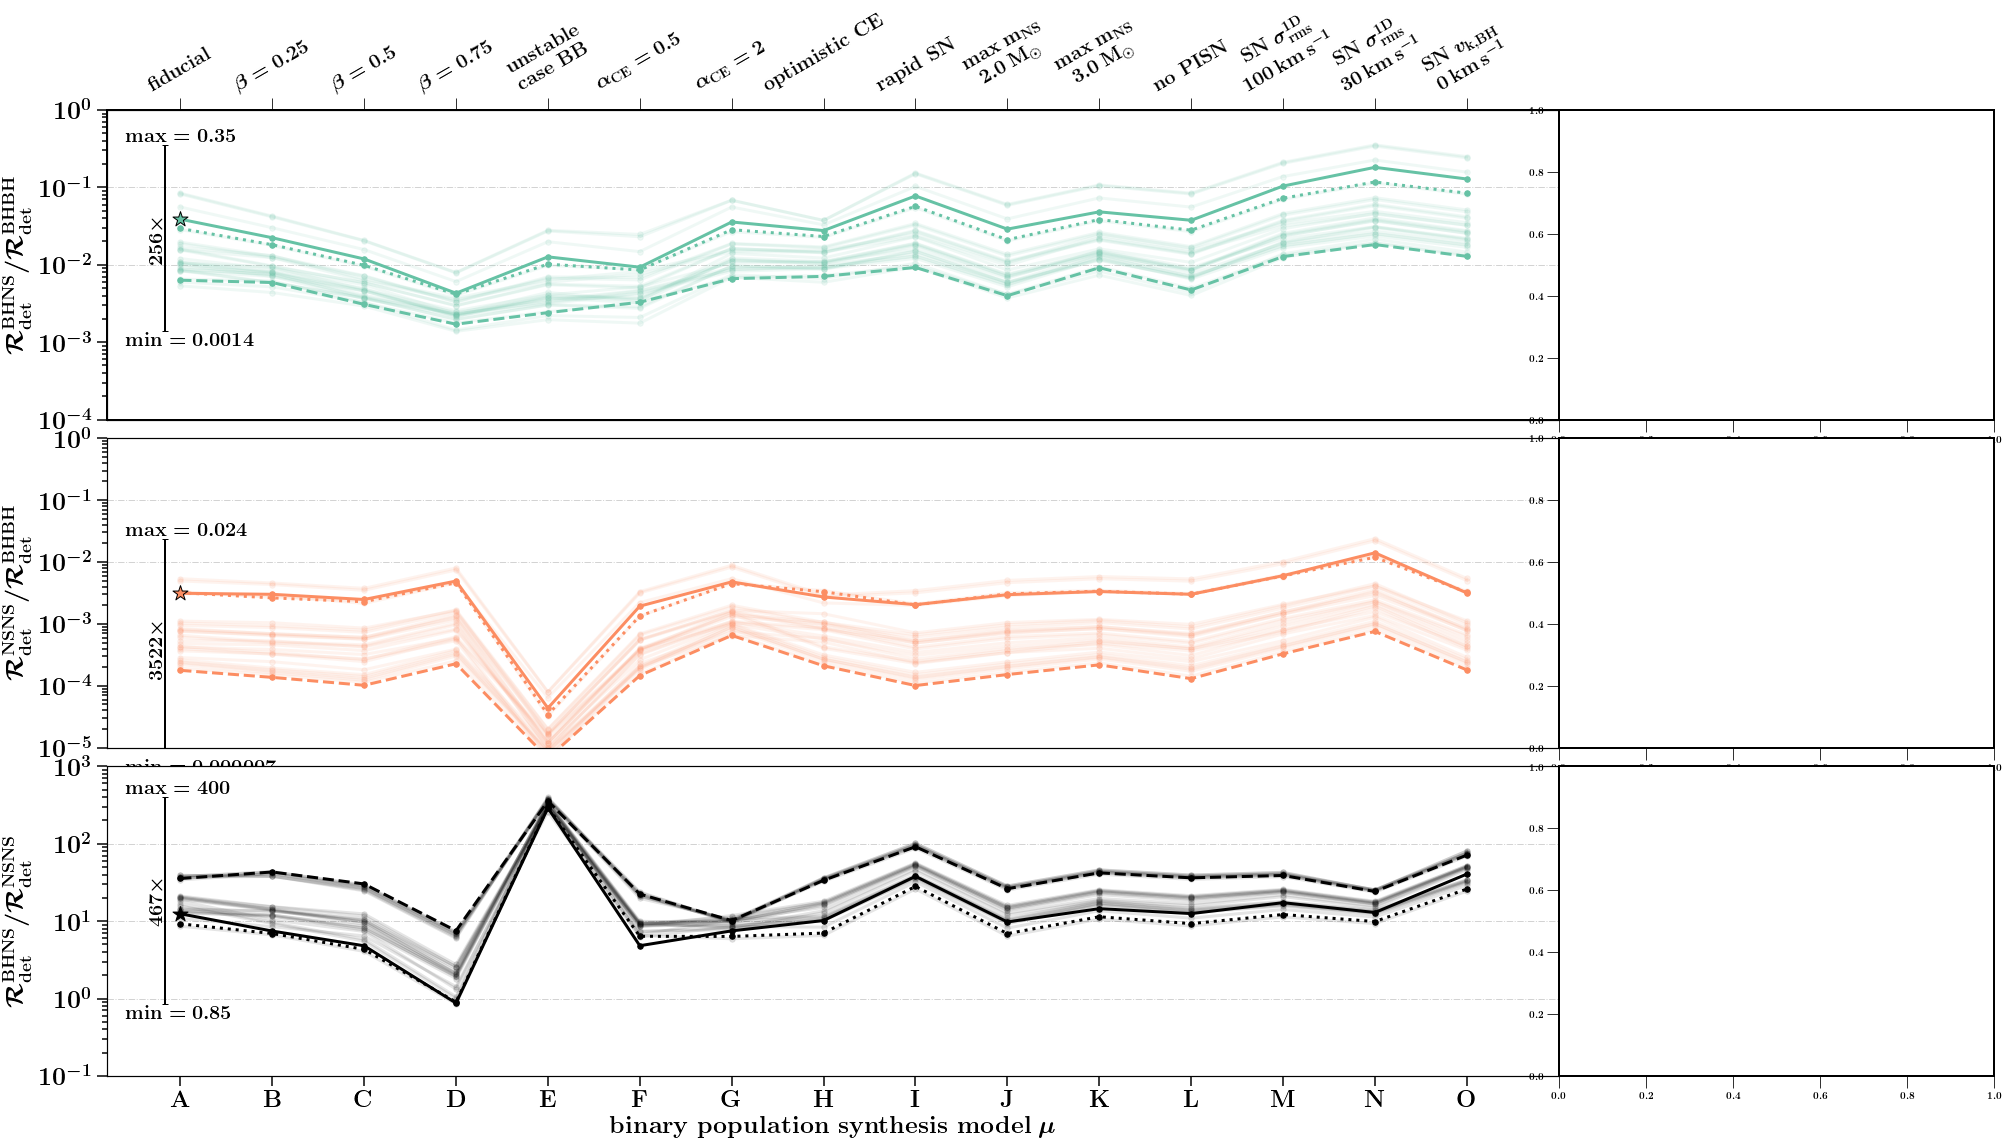

In [8]:
ylims =[[0.0001,1],[0.00001,1],[0.1,1000]]
plotRatesRatios_compare(whichRate='observed')



In [27]:
# NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
# BHBHrate0 = [19.1-9.0, 19.1+16.2] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
# # BHBHrate0 = [23.9-8.6,23.9+14.9] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
# BHNSrate0 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 

NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHBHrate0 = [23.9-8.6, 23.9+14.9] #for z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf





BHBHratez0 = [19.7-15.9, 19.7+57.3] # see point 3 in conclusion https://arxiv.org/pdf/2010.14533.pdf




def plotRatesRatios_compare(whichRate='intrinsic'):
    ncols=2
    nrows=3
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,16), 
                  gridspec_kw={"width_ratios":[2,0.6], "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
    TypeColours = ['#8da0cb','#66c2a5','#fc8d62', 'k']
    
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    
    maxRatio_BHNS = -100
    maxRatio_BNS = -100
    maxRatio_BHNSBNS = -100
    minRatio_BHNS = 100
    minRatio_BNS = 100    
    minRatio_BHNSBNS =100
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        for ind_t, DCOtype in enumerate(Types):

        
            # remove if statement once also created datafiles for BHBH ans NSNS
#             if (DCOtype == 'BHNS') or (DCOtype =='BBH'):
            stringgg = 'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabels =[r'$\mathcal{R}_{\rm{m}}^{{0,\rm{BHNS}}} / \mathcal{R}_{\rm{m}}^{{0,\rm{BHBH}}}$', r'$\mathcal{R}_{\rm{m}}^{{0,\rm{NSNS}}} / \mathcal{R}_{\rm{m}}^{{0,\rm{BHBH}}}$',\
                          r'$\mathcal{R}_{\rm{m}}^{{0,\rm{BHNS}}} / \mathcal{R}_{\rm{m}}^{{0,\rm{NSNS}}}$']

            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabels = [r'$\mathcal{R}_{\rm{det}}^{{\rm{BHNS}}} / \mathcal{R}_{\rm{det}}^{{\rm{BHBH}}}$', r'$\mathcal{R}_{\rm{det}}^{{\rm{NSNS}}} / \mathcal{R}_{\rm{det}}^{{\rm{BHBH}}}$',\
                          r'$\mathcal{R}_{\rm{det}}^{{\rm{BHNS}}} / \mathcal{R}_{\rm{det}}^{{\rm{NSNS}}}$']

            # obtain rates:
            if DCOtype=='BBH':
                rates_BBH = rates
            elif DCOtype=='BHNS':
                rates_BHNS = rates
            elif DCOtype=='BNS':
                rates_BNS = rates
                
        # obtain ratios
        rates_BHNS = rates_BHNS * (1./rates_BBH) *44
        rates_BNS = rates_BNS * (1./rates_BBH) *44
        if ind_L==0:
            print('fiducial BHNS ratio = ', rates_BHNS[0])
            print('fiducial NSNS ratio = ', rates_BNS[0])
            print('per 44 BHBHs:')
            print('fiducial BHNS ratio = ', rates_BHNS[0]*44)
            print('fiducial NSNS ratio = ', rates_BNS[0]*44)
        
        maxRatio_BHNS = np.max(np.concatenate(([maxRatio_BHNS], rates_BHNS)))
        maxRatio_BNS  = np.max(np.concatenate(([maxRatio_BNS], rates_BNS)))
        maxRatio_BHNSBNS = np.max(np.concatenate(([maxRatio_BHNSBNS], rates_BHNS/rates_BNS)))
        minRatio_BHNS = np.min(np.concatenate(([minRatio_BHNS], rates_BHNS)))
        minRatio_BNS  = np.min(np.concatenate(([minRatio_BNS], rates_BNS))) 
        minRatio_BHNSBNS = np.min(np.concatenate(([minRatio_BHNSBNS], rates_BHNS/rates_BNS)))
            
        if ind_L==0:
            COLOR= TypeColours[ind_t]#  'crimson'
            zorder = 100
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[0]
            ALPHA=1
        elif MSSFRname=='231':
            COLOR=TypeColours[ind_t]#'teal'
            zorder=10
            label=MSSFRnameslist[ind_L] 
            ls = MSSFRlinestyles[1]
            ALPHA=1
        elif MSSFRname=='312':
            COLOR=TypeColours[ind_t]#'c'
            zorder=10
            label=MSSFRnameslist[ind_L]
            ls = MSSFRlinestyles[2]
            ALPHA=1
        else:
            COLOR=TypeColours[ind_t]# 'lightgray' #MSSFRcolors[ind_L]
            zorder=2
            label=None    
            ls = MSSFRlinestyles[0]
            ALPHA=0.1
            
            
            
            

        
        axe[0,0].plot(range(len(rates)), rates_BHNS, c=TypeColours[1], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe[0,0].scatter(range(len(rates)), rates_BHNS, c=TypeColours[1], s=130, zorder=zorder, alpha=ALPHA)


        axe[1,0].plot(range(len(rates)), rates_BNS, c=TypeColours[2], lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe[1,0].scatter(range(len(rates)), rates_BNS, c=TypeColours[2], s=130,  zorder=zorder, alpha=ALPHA) 
        

        axe[2,0].plot(range(len(rates)), rates_BHNS/rates_BNS, c='k', lw=3,  zorder=zorder, linestyle=ls, alpha=ALPHA)
        axe[2,0].scatter(range(len(rates)), rates_BHNS/rates_BNS, c='k', s=130,  zorder=zorder, alpha=ALPHA) 
        
#         axe.plot(np.asarray(range(len(rates))), rates_BHNS*1E6, c='k', lw=3, label=label, zorder=zorder, linestyle=ls, alpha=ALPHA)
            
#             axe[ind_t,0].plot(range(len(rates)), rates, c=COLOR, lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
#             axe[ind_t,0].scatter(range(len(rates)), rates, c=COLOR, s=30, label=label, zorder=zorder, alpha=ALPHA, linestyle=ls)
            # plot fiducial result with a star
#         if ind_L==0:
#             axe[0,0].scatter(range(len(rates))[0], rates_BHNS[0],\
#                                c=TypeColours[1], s=250, label=label, \
#                                zorder=1000, marker='*', edgecolor='black')
#             axe[1,0].scatter(range(len(rates))[0], rates_BNS[0],\
#                                            c=TypeColours[2], s=250, label=label, \
#                                            zorder=1000, marker='*', edgecolor='black')
#             axe[2,0].scatter(range(len(rates))[0], (rates_BHNS/rates_BNS)[0],\
#                                c='k', s=250, label=label, \
#                                zorder=1000, marker='*', edgecolor='black')
                

#         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])




        ## set some of the axes ranges 
        xmin = -0.8
        xmax = nModels -0.5 # change to len(df.T)
#         xmax_compare = xmax+5


        # FIX
        fix=1
        


        # calculate statistics: 
#         minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)

        
        
        
#         print('mean scatter per MSSFR:')
#         print((minMaxPerMSSFR[1] / minMaxPerMSSFR[0]))
#         print(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])))
#         meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
        
#         print('mean scatter per BPS:')
# #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])
#         print(minMaxPerBPS[1]/minMaxPerBPS[0])
#         print(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]))    
#         meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
# #         x = nrDATAready 
#         textt_MSSFR = r'$\langle \sigma_{\rm{xyz}}\rangle \approx %s \times$'%meanScatterDueToMSSFR
#         textt_BPS = r'$\langle \sigma_{\mu}\rangle \approx %s \times$'%meanScatterDueToBPS
#         minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
    

    xloc_text = 0.8502
#         axe[ind_t,0].text(xloc_text, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
#         axe[ind_t,0].text(xloc_text, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
                        
#         axe[ind_t,0].text(0.89, 0.4, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
#         axe[ind_t,0].text(0.89, 0.5, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')
        
        
#         ## MAKE RANGE ERROR LINE: 
#         resN = 20
#         scatterline_x = -0.25 * np.ones(resN)
#         scatterline_y = np.linspace(minn,maxx, resN)
#         axe[ind_t,0].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
#         textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
#         yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
#         axe[ind_t,0].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

        
#         axe[ind_t,0].text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
#         axe[ind_t,0].text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
                
        

        
        
    xx = np.linspace(xmin,xmax,15)
        
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t,0].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)

            
#             if ind_t ==0:
#                 # for BHBH rates also plot intrinsic z=0
#                 min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
#                 max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t,0].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")
#                 axe[ind_t,0].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")
# #                 axe[ind_t,0].text(xx[-5], max_obs_rate[0], r'$\mathcal{R}(z=0)$' , rotation = 0, fontsize = fs-12, color = 'k', ha = 'right')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
            
#             # OLD 
# #             min_obs_rate = np.ones_like(xx)*ObservedRatesListOld[ind_t][0]
# #             max_obs_rate = np.ones_like(xx)*ObservedRatesListOld[ind_t][1]
# #             axe[ind_t,0].plot(xx, min_obs_rate, alpha=1, color='lightgray', zorder=0, lw=3, linestyle=':')
# #             axe[ind_t,0].plot(xx, max_obs_rate, alpha=1, color='lightgray', zorder=0, lw=3, linestyle=':')
# #             axe[ind_t,0].text(xx[-1], max_obs_rate[0], 'previous rate limits' , rotation = 0, fontsize = fs-12, color = 'k', ha = 'right')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
                        

            
#             # for BHNS plot that its a upper limit
#             if ind_t==1:
#                 axe[ind_t,0].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)
            
#         else:


    for ind_t in range(3):



#         # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
            axe[ind_t,0].set_xticks(range(nModels))
        else:
            xlabel=r'  $\_$ ' 

        for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
            axe[ind_t,0].plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
        axe[ind_t,0].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

        
        axe[ind_t,0].set_xlim(xmin, xmax)
        axe[ind_t,0] == layoutAxes(axe[ind_t,0], nameX=xlabel, nameY=ylabels[ind_t], setMinor=False)
        axe[ind_t,0].set_yscale('log')    
        
        
        if ind_t==0:
            minn, maxx = minRatio_BHNS, maxRatio_BHNS
        elif ind_t==1:
            minn, maxx = minRatio_BNS, maxRatio_BNS
        elif ind_t==2:
            minn, maxx = minRatio_BHNSBNS, maxRatio_BHNSBNS
        if whichRate=='intrinsic':
            textt_min = r'${\rm{min}} = %s $'%roundAndFormat(minn)
            textt_max = r'${\rm{max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'${\rm{min}} = %s $'%roundAndFormat(minn)
            textt_max = r'${\rm{max}} = %s $'%roundAndFormat(maxx)
        xloc_text = 0.8502
        axe[ind_t,0].text(-0.6, minn, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')
        axe[ind_t,0].text(-0.6, maxx, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe[ind_t,0].transAxes)#, weight = 'bold')

        
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe[ind_t,0].errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe[ind_t,0].text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-4, color='k', ha='right', va='center')

#         ##### SECOND AXIS ######
#         physicalNames = [r'fiducial', r'optimistic \n CE', r'$\alpha=0.5$', r'$\alpha=2$', 'unstable \n case BB', 'rapid SN', r'$\sigma_{\rm{BH}}=0$', r'$\beta=0.25$', r'$\beta=0.5$', , r'$\beta=0.75$',r'$\sigma_{\rm{cc}}=100$',r'$\sigma_{\rm{cc}}=30$' ]
#         ax2y = ax[ind_t,0].twiny()
        
#         # calculate period for 10 Msun BH and 1.4 Msun NS 
#         xx_sep = np.logspace(-1,3,1000)
#         Period = convert_a_to_P_circular(separation=xx_sep*u.Rsun, M1=1.4*u.Msun, M2=10*u.Msun)
#         Period = Period.to(u.d)
#         ax2y.set_xlim(np.min(Period.value),np.max(Period.value))
#         ax2y.set_xscale('log')

#         ax2y.tick_params(labelsize=fs)
#         ax2y.set_xlabel(xlabel, fontsize=fs)   
        
        #############################
        
    
        axe[ind_t,0].set_xticklabels(BPSnameslist)

        axe[ind_t,0].set_ylim(ylims[ind_t][0]*44, ylims[ind_t][1]*44 )

#         axe[ind_t,0].text(xloc_text, 0.88, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe[ind_t,0].transAxes)#, weight = 'bold')

#         if ind_t==0: 
#             handles, labels = axe[ind_t,0].get_legend_handles_labels()
# #             mask = [0,1,2,7]
#             mask=[0,20, 6]
# #             labels=['000', '111', '211', '113']
#             labels = ['000',  '231', '312']
#             lgd = f.legend(np.asarray(handles)[mask], np.asarray(labels), fontsize=fs-2, ncol=9,\
#                      bbox_to_anchor=(.76, 1.04),  markerscale=2., scatterpoints=1) # loc = 'upper center')        
    

        ##### SECOND AXIS ######
        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
    #                 physicalnames.append(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model])
    #                 physicalnames.append(r'\textbf{%s: }'%(bps_model) + alphabetPhysicalNameDict[bps_model])
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe[ind_t,0].twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)      
#     xx2 = np.linspace(xmax+1, xmax+1, 10)
#     yy2 = np.linspace(ylims[ind_t][0], ylims[ind_t][1], 10)
#     axe[ind_t,0].plot(xx2, yy2, lw=3, c='k')
        # set physical labels on bottom
    
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
    #                 physicalnames.append(r'\textbf{model %s:}'%(bps_model) +'\n' + alphabetPhysicalNameDict[bps_model])
    #                 physicalnames.append(r'\textbf{%s: }'%(bps_model) + alphabetPhysicalNameDict[bps_model])
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe[ind_t,0].set_xticks(range(nModels))
            axe[ind_t,0].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe[ind_t,0].set_ylim(ylims[ind_t][0]*44, ylims[ind_t][1]*44 )
        else:
            axe[ind_t,0].set_xticks([])
            axe[ind_t,0].set_xticklabels( () )
            
            
            

    ################################################################ 
    #################### 2nd figure ################################
    ################################################################
    
    nComparisons = 14
    xx = np.asarray(range(nComparisons)) -1 
    xmin, xmax = np.min(xx), np.max(xx) -1
    
    
    
    Ncompare = 12
    if whichRate=='intrinsic':
        for ind_t, DCOtype in enumerate(Types):
        
            
            df_name = '/Users/floorbroekgaarden/Downloads/'+TypesLabels[ind_t]+'_intrinsic.csv'
            df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
#             for ind_n, name in enumerate(df.columns):
#                 rate = df[name]
#                 mask_notna = (df[name].notna())
#                 rate = rate[mask_notna]
#                 colors = sns.color_palette("husl", len(rate))
#                 axe[ind_t,1].scatter(  ind_n*np.ones_like(rate), rate, s=30, c='gray')
        
        
        df_name_BHBH = '/Users/floorbroekgaarden/Downloads/BHBH_intrinsic.csv'
        df_name_BHNS = '/Users/floorbroekgaarden/Downloads/BHNS_intrinsic.csv'
        df_name_NSNS = '/Users/floorbroekgaarden/Downloads/NSNS_intrinsic.csv'

        df_BHBH = pd.read_csv(df_name_BHBH, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
        df_BHNS = pd.read_csv(df_name_BHNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)
        df_NSNS = pd.read_csv(df_name_NSNS, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13], usecols=np.asarray(range(Ncompare))+1)        
        for ind_n, name in enumerate(df.columns):
            rate_BHBH = df_BHBH[name][df_BHBH[name].notna()]#.astype(float)
            rate_BHNS = df_BHNS[name][df_BHNS[name].notna()]#.astype(float)
            rate_NSNS = df_NSNS[name][df_NSNS[name].notna()]#.astype(float)
            
            maskBHBH = (rate_BHBH>= BHBHratez0[0]) & (rate_BHBH <=BHBHratez0[1])
            maskBHNS = (rate_BHNS>= ObservedRatesList[1][0]) & (rate_BHNS <=ObservedRatesList[1][1])
            maskNSNS = (rate_NSNS>= ObservedRatesList[2][0]) & (rate_NSNS <=ObservedRatesList[2][1])
            
            maskGWTC2 = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 
            
            axe[0,1].scatter(  ind_n*np.ones_like(rate_BHBH), (rate_BHNS/rate_BHBH)*44, s=75, c='gray')#, marker='x')
            axe[1,1].scatter(  ind_n*np.ones_like(rate_BHNS), (rate_NSNS/rate_BHBH)*44, s=75, c='gray')#, marker='x')
            axe[2,1].scatter(  ind_n*np.ones_like(rate_NSNS), (rate_BHNS/rate_NSNS)*44, s=75, c='gray')#, marker='x')
            
            axe[0,1].scatter(  ind_n*np.ones_like(rate_BHBH)[maskGWTC2], (rate_BHNS/rate_BHBH)[maskGWTC2]*44, s=75, c='r', marker='x')
            axe[1,1].scatter(  ind_n*np.ones_like(rate_BHNS)[maskGWTC2], (rate_NSNS/rate_BHBH)[maskGWTC2]*44, s=75, c='r', marker='x')
            axe[2,1].scatter(  ind_n*np.ones_like(rate_NSNS)[maskGWTC2], (rate_BHNS/rate_NSNS)[maskGWTC2]*44, s=75, c='r', marker='x')
          
 
            
        for ind_t in range(3):
            if ind_t==2:
                physicalnames = []
                for ind_m, bps_model in enumerate(df.columns):
                    physicalnames.append(r'\textbf{%s}'%(bps_model) )
                axe[ind_t,1].set_xticks(range(nModels))
                axe[ind_t,1].set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
                axe[ind_t,1].set_xticks(range(len(df.columns)))
                axe[ind_t,1].set_xticklabels(physicalnames, rotation=90, fontsize=12)

                axe[ind_t,1].set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            else:
                print('getting here , ', ind_t)
                axe[ind_t,1].set_xticks([])
                axe[ind_t,1].set_xticklabels( () )


    #     ######################
    #     # make up all the nice things in background and axes

    #     for ind_t, DCOtype in enumerate(Types):
            axe[ind_t,1].set_xlim(xmin, xmax)
    #         axe[ind_t,1] == CV.layoutAxes(axe[ind_t,1], nameX=xlabel, nameY=ylabel)
            axe[ind_t,1].set_yscale('log')    

            axe[ind_t,1].set_ylim(ylims[ind_t][0]*44, ylims[ind_t][1]*44 )
            axe[ind_t,1].tick_params(labelsize=18)
    
    
    
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
#             axe[ind_t,1].fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color=TypeColours[ind_t], zorder=1)

            
#             if ind_t ==0:
#                 # for BHBH rates also plot intrinsic z=0
#                 min_obs_rate2 = np.ones_like(xx)*BHBHratez0[0]
#                 max_obs_rate2 = np.ones_like(xx)*BHBHratez0[1]
#                 axe[ind_t,1].fill_between(xx, min_obs_rate2, min_obs_rate,  alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")
#                 axe[ind_t,1].fill_between(xx, max_obs_rate,  max_obs_rate2, alpha=0.2, color=TypeColours[ind_t], zorder=1, hatch="/")            

            
#             # for BHNS plot that its a upper limit
#             if ind_t==1:
#                 axe[ind_t,1].scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=25)    
    

    
    

#     axe[ind_t,1] == CV.layoutAxes(axe[ind_t,1], nameX=xlabel, nameY=ylabel)    
    ################################################################
    ################################################################
    ################################################################
    
    
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    plt.savefig('./RatesRatios_' +whichRate + '_AllDCO_newGWTC2_compare.png', dpi=300, transparent=False)#,\
    plt.savefig('./RatesRatios_' +whichRate + '_AllDCO_newGWTC2_compare.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()

    return




the observed fiducial rate for  BBH = 281.74394058639325
the observed fiducial rate for  BHNS = 10.827595525955116
the observed fiducial rate for  BNS = 0.8758659294668016
fiducial BHNS ratio =  1.6909474686499555
fiducial NSNS ratio =  0.136784133906589
per 44 BHBHs:
fiducial BHNS ratio =  74.40168862059804
fiducial NSNS ratio =  6.018501891889916


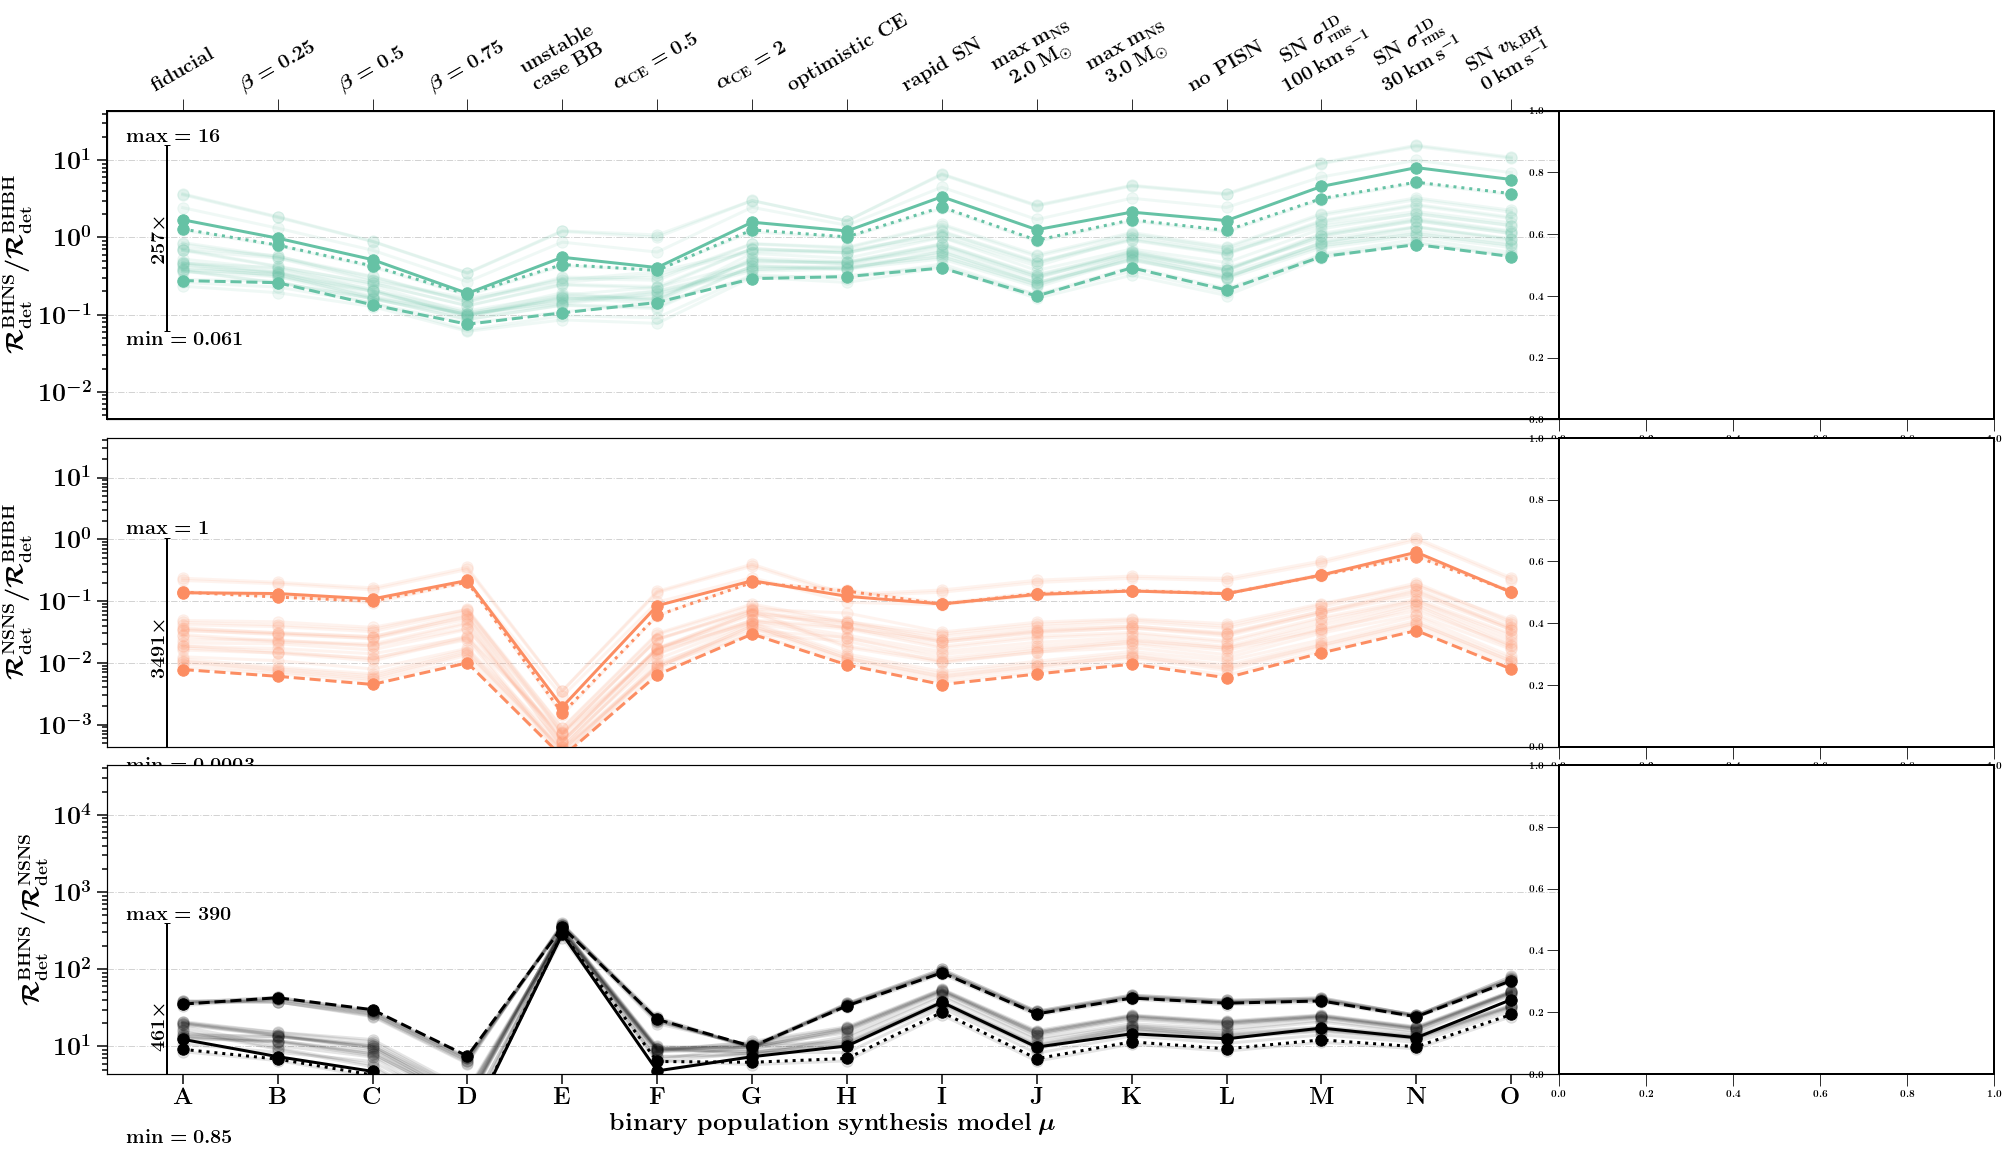

In [28]:
ylims =[[0.0001,1],[0.00001,1],[0.1,1000]]
plotRatesRatios_compare(whichRate='observed')



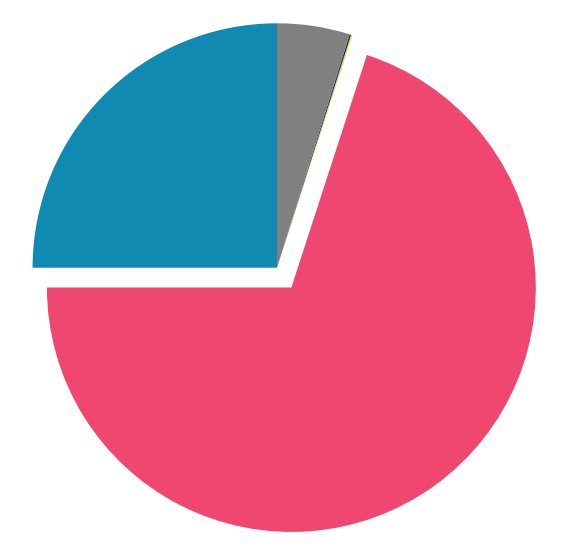

In [44]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'classic CE', 'only stable mass transfer', 'single-core CE', 'double-core CE', 'other'
sizes = [25, 70, 0.1, 0.1, 4.8]
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors =  [ '#118AB2', '#EF476F', '#FFD166', '#073B4C', 'gray']



fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=None, 
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('./Pie_BHBH.png', dpi=300, transparent=False)#,\ 
plt.show()

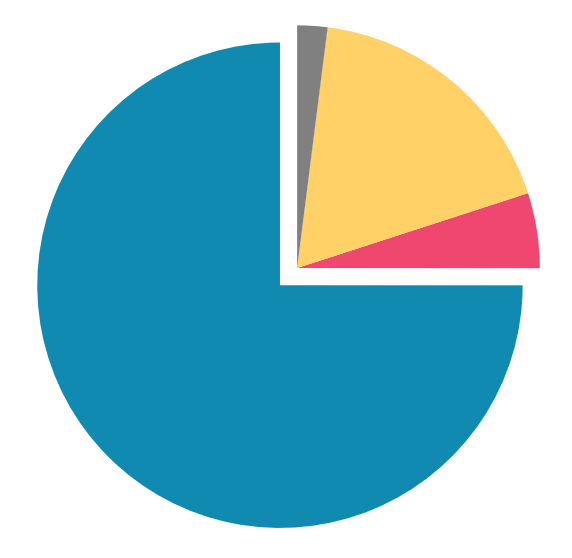

In [42]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'classic CE', 'only stable mass transfer', 'single-core CE', 'double-core CE', 'other'
sizes = [75, 5, 18, 0.01, 2]
explode = (0.1, 0.0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors =  [ '#118AB2', '#EF476F', '#FFD166', '#073B4C', 'gray']



fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=None, 
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('./Pie_BHNS.png', dpi=300, transparent=False)#,\ 
plt.show()

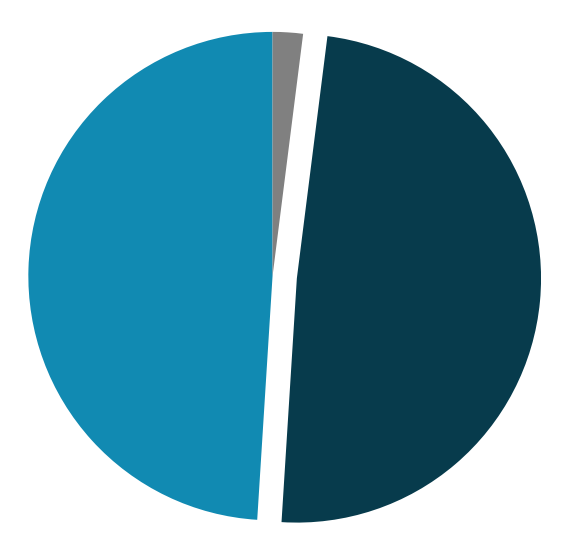

In [43]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'classic CE', 'only stable mass transfer', 'single-core CE', 'double-core CE', 'other'
sizes = [49, 0, 0, 49, 2]
explode = (0.0, 0.0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors =  [ '#118AB2', '#EF476F', '#FFD166', '#073B4C', 'gray']



fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=None, 
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('./Pie_NSNS.png', dpi=300, transparent=False)#,\ 
plt.show()